## Catalog Exploration

ObsPy can read SEISAN catalog easily. 

In [1]:
from obspy import read_events

In [2]:
catalog = read_events("hyp_koeri_2020.out")

/home/ege/miniconda3/envs/dsml/lib/python3.12/site-packages/obspy/io/nordic/utils.py:184: UserWarning: Lines of type I have not been implemented yet, please submit a development request
  warnings.warn("Lines of type %s have not been implemented yet, "


In [3]:
catalog

789 Event(s) in Catalog:
2020-01-01T19:01:54.900000Z | +40.820,  +28.930 | 2.1  ML
2020-01-02T04:57:48.500000Z | +40.635,  +29.132 | 2.0  ML
...
2020-09-29T07:11:43.000000Z | +40.843,  +28.184 | 1.7  ML
2020-09-30T11:17:58.200000Z | +40.532,  +29.245 | 1.4  ML
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [6]:
catalog[0].picks

[Pick
	     resource_id: ResourceIdentifier(id="smi:local/cf745eaf-93ba-4c14-b9d9-4a1d61b0bef6")
	            time: UTCDateTime(2020, 1, 1, 19, 1, 58, 800000)
	     waveform_id: WaveformStreamID(network_code='', station_code='BRGA', channel_code='')
	      phase_hint: 'IAML'
	 evaluation_mode: 'manual',
 Pick
	     resource_id: ResourceIdentifier(id="smi:local/6a563c86-af6a-4e66-ac44-1dd9672a262d")
	            time: UTCDateTime(2020, 1, 1, 19, 2, 1)
	     waveform_id: WaveformStreamID(network_code='', station_code='BRGA', channel_code='')
	      phase_hint: 'IAML'
	 evaluation_mode: 'manual',
 Pick
	     resource_id: ResourceIdentifier(id="smi:local/bb60cc6f-f21c-46fc-928e-5043a98924dd")
	            time: UTCDateTime(2020, 1, 1, 19, 1, 58, 800000)
	     waveform_id: WaveformStreamID(network_code='', station_code='HYBA', channel_code='')
	      phase_hint: 'IAML'
	 evaluation_mode: 'manual',
 Pick
	     resource_id: ResourceIdentifier(id="smi:local/ec1b8221-2e30-411c-a2c5-92ab3ecadafe

In [ ]:
events_data = []
for event in catalog:
    origin = event.preferred_origin() or event.origins[0] if event.origins else None
    magnitude = event.preferred_magnitude() or event.magnitudes[0] if event.magnitudes else None
    
    if origin:
        events_data.append({
            'datetime': origin.time.datetime if origin.time else None,
            'latitude': origin.latitude,
            'longitude': origin.longitude,
            'depth': origin.depth / 1000 if origin.depth is not None else None,  # Convert m to km
            'magnitude_type': magnitude.magnitude_type if magnitude else None,
            'magnitude': magnitude.mag if magnitude else None
        })

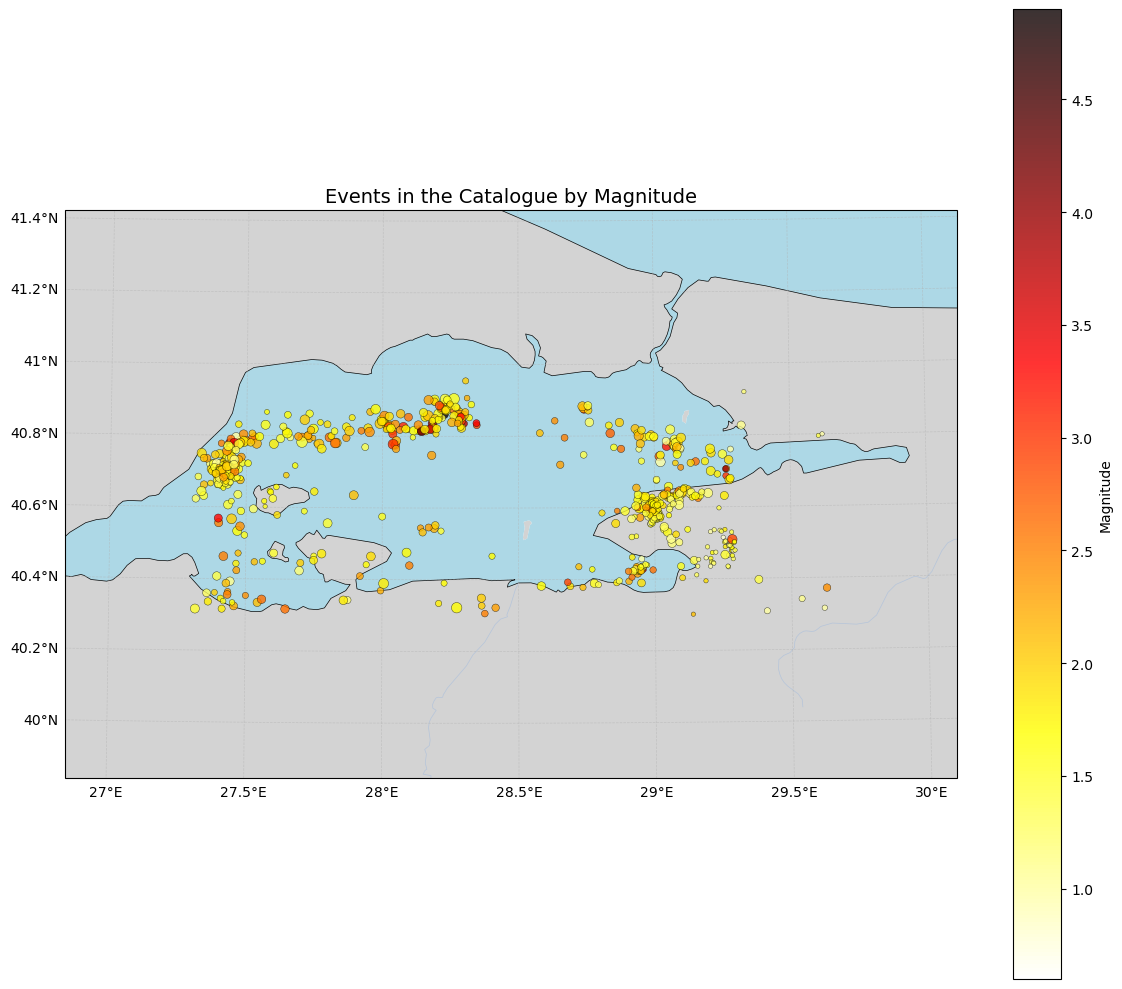

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

fig = plt.figure(figsize=(12, 10))

lats = [event.origins[0].latitude for event in catalog]
lons = [event.origins[0].longitude for event in catalog]

#Create local projection
center_lat = np.mean(lats)
center_lon = np.mean(lons)
projection = ccrs.NearsidePerspective(
    central_longitude=center_lon,
    central_latitude=center_lat,
    satellite_height=3000000.0  #Reduce height for more zoom
)

#Create map axes with the projection
ax = fig.add_subplot(1, 1, 1, projection=projection)

ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.add_feature(cfeature.RIVERS, linewidth=0.5, alpha=0.5)

#Get depths and magnitudes
depths = [event.origins[0].depth/1000 if event.origins[0].depth else 0 for event in catalog]
magnitudes = []
for event in catalog:
    if event.magnitudes:
        magnitudes.append(event.magnitudes[0].mag)
    else:
        magnitudes.append(0)

marker_sizes = [max(10, d * 2 + 10) for d in depths]  # Deeper = larger marker

scatter = ax.scatter(
    lons, lats,
    transform=ccrs.PlateCarree(),  #Input coordinates are lat/lon
    c=magnitudes,
    s=marker_sizes,
    cmap='hot_r',  #Reverse hot colormap: white for low, red/yellow for high
    alpha=0.8,
    zorder=5,
    edgecolor='k',
    linewidth=0.3
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.05)
cbar.set_label('Magnitude')

lat_range = max(lats) - min(lats)
lon_range = max(lons) - min(lons)
padding = max(lat_range, lon_range) * 0.2  #Reduce padding for zoom
ax.set_extent(
    [min(lons) - padding, max(lons) + padding, 
     min(lats) - padding, max(lats) + padding],
    crs=ccrs.PlateCarree()
)

gl = ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False  

plt.title('Events in the Catalogue by Magnitude', fontsize=14)

plt.tight_layout()
plt.show()

### Example Event from Catalog

In [7]:
event_0 = catalog[0]
event_0

Event:	2020-01-01T19:01:54.900000Z | +40.820,  +28.930 | 2.1  ML

	            resource_id: ResourceIdentifier(id="smi:local/c96f9ef5-a8c2-471b-abc8-a7d46a7e8950")
	             event_type: 'earthquake'
	   event_type_certainty: 'known'
	          creation_info: CreationInfo(agency_id='')
	    preferred_origin_id: ResourceIdentifier(id="smi:local/ffdd09a0-47c5-48fa-9288-fad65a37ca4e")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:local/31943e33-6790-42c7-ac6f-6517667b69f3")
	                   ---------
	     event_descriptions: 1 Elements
	               comments: 1 Elements
	                  picks: 21 Elements
	             amplitudes: 21 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements

In [8]:
origin_0 = event_0.preferred_origin()
origin_0

Origin
	   resource_id: ResourceIdentifier(id="smi:local/ffdd09a0-47c5-48fa-9288-fad65a37ca4e")
	          time: UTCDateTime(2020, 1, 1, 19, 1, 54, 900000)
	     longitude: 28.9303
	      latitude: 40.8197
	         depth: 13100.0
	       quality: OriginQuality(used_station_count=17, standard_error=0.15, azimuthal_gap=88.0)
	 creation_info: CreationInfo(agency_id='')

In [9]:
origin_0.time

2020-01-01T19:01:54.900000Z

In [10]:
origin_0.time.datetime

datetime.datetime(2020, 1, 1, 19, 1, 54, 900000)

In [11]:
event_0.picks

[Pick
	     resource_id: ResourceIdentifier(id="smi:local/706413d5-a112-4d1e-9c24-459587c238bf")
	            time: UTCDateTime(2020, 1, 1, 19, 1, 58, 800000)
	     waveform_id: WaveformStreamID(network_code='', station_code='BRGA', channel_code='')
	      phase_hint: 'IAML'
	 evaluation_mode: 'manual',
 Pick
	     resource_id: ResourceIdentifier(id="smi:local/6bda9107-01a3-420a-9e0f-1437df486c71")
	            time: UTCDateTime(2020, 1, 1, 19, 2, 1)
	     waveform_id: WaveformStreamID(network_code='', station_code='BRGA', channel_code='')
	      phase_hint: 'IAML'
	 evaluation_mode: 'manual',
 Pick
	     resource_id: ResourceIdentifier(id="smi:local/18a3277e-3621-4718-812c-41f72bf39ed3")
	            time: UTCDateTime(2020, 1, 1, 19, 1, 58, 800000)
	     waveform_id: WaveformStreamID(network_code='', station_code='HYBA', channel_code='')
	      phase_hint: 'IAML'
	 evaluation_mode: 'manual',
 Pick
	     resource_id: ResourceIdentifier(id="smi:local/50f173c0-8445-433a-96ec-5df546fc59b0

In [12]:
pick_00 =event_0.picks[0]
pick_00

Pick
	     resource_id: ResourceIdentifier(id="smi:local/706413d5-a112-4d1e-9c24-459587c238bf")
	            time: UTCDateTime(2020, 1, 1, 19, 1, 58, 800000)
	     waveform_id: WaveformStreamID(network_code='', station_code='BRGA', channel_code='')
	      phase_hint: 'IAML'
	 evaluation_mode: 'manual'

In [13]:
pick_00.waveform_id.station_code

'BRGA'

In [3]:
from catalog2csv import cat2csv
input_file = "hyp_koeri_2020.out"  
events_output = "earthquake_events.csv"
stations_output = "station_arrivals.csv"

cat2csv(input_file, events_output, stations_output)

Reading catalog from hyp_koeri_2020.out...


/home/ege/miniconda3/envs/dsml/lib/python3.12/site-packages/obspy/io/nordic/utils.py:184: UserWarning: Lines of type I have not been implemented yet, please submit a development request
  warnings.warn("Lines of type %s have not been implemented yet, "


Successfully read 789 events from catalog
Events written to earthquake_events.csv
Station information written to station_arrivals.csv (first arrival only)


In [1]:
import pandas as pd
events_df = pd.read_csv("earthquake_events.csv",parse_dates=['datetime'])
events_df

,datetime,latitude,longitude,depth,magnitude_type,magnitude
0,2020-01-01 19:01:54.900,40.8197,28.9303,13.1,ML,2.1
1,2020-01-02 04:57:48.500,40.6353,29.1317,7.0,ML,2.0
2,2020-01-02 11:18:40.900,40.8308,28.3470,7.5,ML,2.9
3,2020-01-02 18:58:53.200,40.7002,29.2073,16.4,ML,1.8
4,2020-01-03 00:39:11.700,40.8820,28.2262,10.0,ML,1.6
...,...,...,...,...,...,...
784,2020-09-27 00:58:42.300,40.8212,28.1990,12.0,ML,1.8
785,2020-09-27 22:54:36.200,40.5463,27.4783,14.5,ML,2.4
786,2020-09-29 04:52:59.400,40.7453,27.3847,10.7,ML,2.0
787,2020-09-29 07:11:43.000,40.8432,28.1837,6.5,ML,1.7


In [2]:
arrival_df = pd.read_csv("station_arrivals.csv",parse_dates=['datetime', 'arrival_time'])
arrival_df

,datetime,station_name,phase,arrival_time,amplitude,period
0,2020-01-01 19:01:54.900,BRGA,IAML,2020-01-01 19:01:58.800,8.600000e-09,NaN
1,2020-01-01 19:01:54.900,HYBA,IAML,2020-01-01 19:01:58.800,8.600000e-09,NaN
2,2020-01-01 19:01:54.900,BUYA,IAML,2020-01-01 19:01:59.100,8.600000e-09,NaN
3,2020-01-01 19:01:54.900,TUZL,IAML,2020-01-01 19:02:00.600,8.600000e-09,NaN
4,2020-01-01 19:01:54.900,ARMT,IAML,2020-01-01 19:02:00.900,8.600000e-09,NaN
...,...,...,...,...,...,...
14605,2020-09-29 07:11:43.000,YAYO,IAML,2020-09-29 07:12:10.800,1.000000e-10,NaN
14606,2020-09-30 11:17:58.200,GEML,IAML,2020-09-30 11:17:59.900,1.400000e-09,NaN
14607,2020-09-30 11:17:58.200,ARMT,IAML,2020-09-30 11:18:04.900,1.400000e-09,NaN
14608,2020-09-30 11:17:58.200,SUSR,IAML,2020-09-30 11:18:19.900,1.400000e-09,NaN


In [3]:
events_df["datetime"]

0     2020-01-01 19:01:54.900
1     2020-01-02 04:57:48.500
2     2020-01-02 11:18:40.900
3     2020-01-02 18:58:53.200
4     2020-01-03 00:39:11.700
                ...          
784   2020-09-27 00:58:42.300
785   2020-09-27 22:54:36.200
786   2020-09-29 04:52:59.400
787   2020-09-29 07:11:43.000
788   2020-09-30 11:17:58.200
Name: datetime, Length: 789, dtype: datetime64[ns]

## Some Statistics for Station and Date Selection Process

Since our catalog encompasses a large date range, I want to look at some statistics to determine a good time interval for waveforms and stations. 

/home/ege/rawcovar/catalog_implementation/catalog_stats.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['period_start'] = df_filtered['datetime'].dt.to_period(period).apply(lambda r: r.start_time)


Event Frequency Analysis (Magnitude >= 1.0, D Period):

Top 10 Most Active Periods:
    period_start  event_count  mean_magnitude  max_magnitude
6     2020-01-11           65        1.632308            4.9
163   2020-09-09           39        1.751282            3.2
162   2020-09-08           25        1.984000            4.6
227   2020-11-20           17        2.076471            3.5
235   2020-11-29           16        1.868750            2.9
237   2020-12-01           13        1.792308            3.1
206   2020-10-26           12        1.600000            2.3
234   2020-11-28           11        1.736364            3.0
239   2020-12-03           10        1.640000            3.3
18    2020-01-31           10        1.870000            2.3

Top Active Period:
period_start      2020-01-11 00:00:00
event_count                        65
mean_magnitude               1.632308
max_magnitude                     4.9
Name: 6, dtype: object


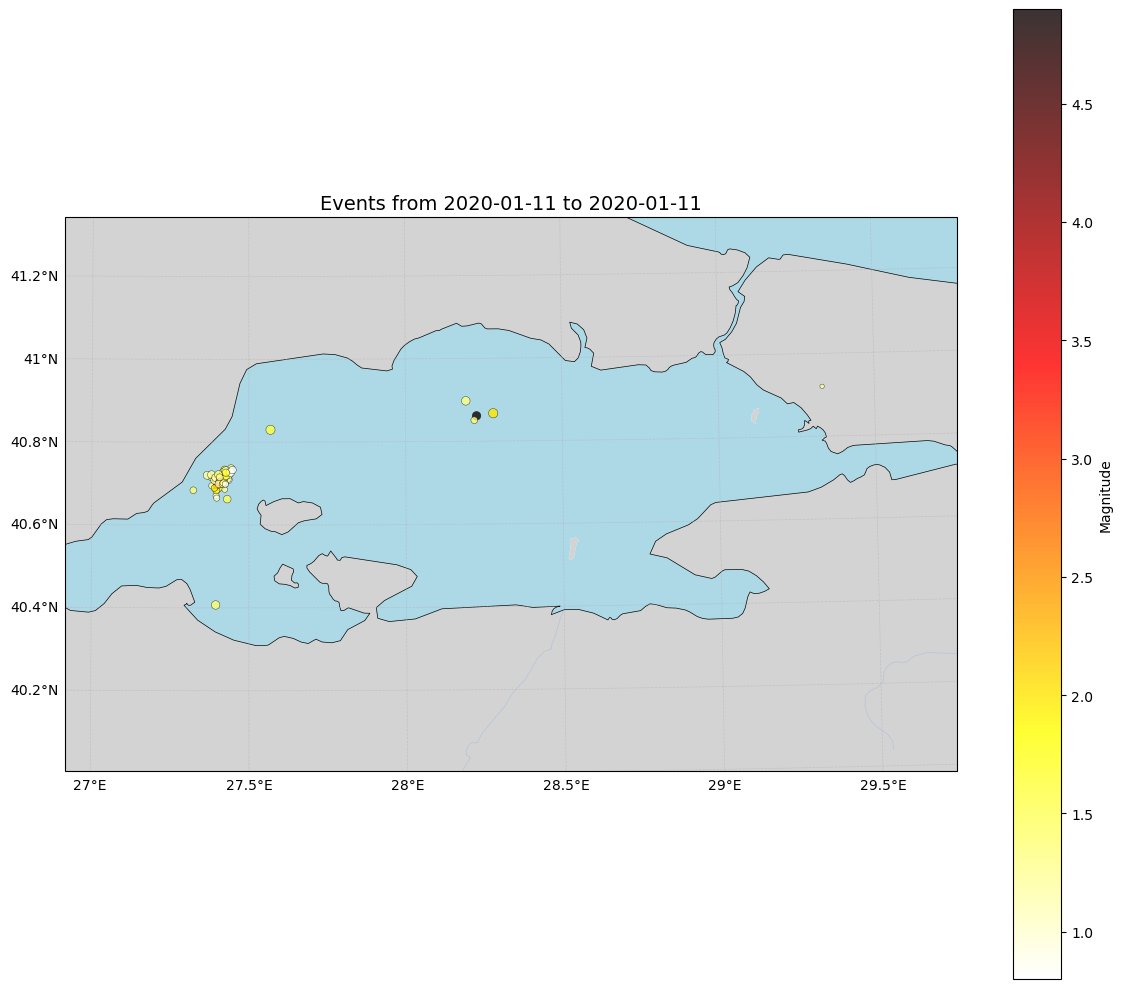


Station Arrival Analysis for Top Period:

Top 10 Stations by Number of Arrivals:
  station_name  arrival_count
0         KRBG             69
1         MRMT             68
2         SUSR             67
3          ALN             65
4         GAZK             65
5          RKY             64
6         ERIK             54
7         GELI             49
8         ENEZ             44
9         UKOP             43

Top 10 Stations Magnitude Coverage:
   station_name  count  min  max      mean
51         KRBG     69  0.8  4.9  1.572464
57         MRMT     68  0.8  3.1  1.523529
80         SUSR     67  0.8  4.9  1.577612
1           ALN     65  0.8  4.9  1.576923
33         GAZK     65  0.8  4.9  1.575385
67          RKY     64  0.8  4.9  1.592188
29         ERIK     54  0.8  4.9  1.659259
35         GELI     49  0.9  4.9  1.736735
27         ENEZ     44  0.9  4.9  1.736364
25          EDC     43  1.0  4.9  1.820930


In [4]:
from catalog_stats import filtered_cat_summary
filtered_cat_summary(event_df=events_df, station_df=arrival_df)

Good candidate for monthly period: KRBG and GAZK for 09-2020 

Good candidate for daily period: KRBG and MRMT for 11-01-2020 and KRBG and GAZK and MRMT for 09-09-2020

### KRBG, GAZK and MRMT for 09-09-2020

In [26]:
import obspy

krbg_st = obspy.read("krbg.mseed")
krbg_st

234 Trace(s) in Stream:

KO.KRBG..HHE | 2020-09-08T23:58:18.730000Z - 2020-09-09T00:10:20.360000Z | 100.0 Hz, 72164 samples
...
(232 other traces)
...
KO.KRBG..HNZ | 2020-09-09T22:40:19.690000Z - 2020-09-09T22:52:30.890000Z | 100.0 Hz, 73121 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [27]:
krbg_st.merge(fill_value=0)

6 Trace(s) in Stream:
KO.KRBG..HHE | 2020-09-08T23:58:18.730000Z - 2020-09-09T22:52:27.220000Z | 100.0 Hz, 8244850 samples
KO.KRBG..HHN | 2020-09-08T23:58:17.720000Z - 2020-09-09T22:52:26.730000Z | 100.0 Hz, 8244902 samples
KO.KRBG..HHZ | 2020-09-08T23:58:18.270000Z - 2020-09-09T22:52:27.680000Z | 100.0 Hz, 8244942 samples
KO.KRBG..HNE | 2020-09-08T23:58:17.680000Z - 2020-09-09T22:52:29.350000Z | 100.0 Hz, 8245168 samples
KO.KRBG..HNN | 2020-09-08T23:58:15.450000Z - 2020-09-09T22:52:27.530000Z | 100.0 Hz, 8245209 samples
KO.KRBG..HNZ | 2020-09-08T23:58:18.900000Z - 2020-09-09T22:52:30.890000Z | 100.0 Hz, 8245200 samples

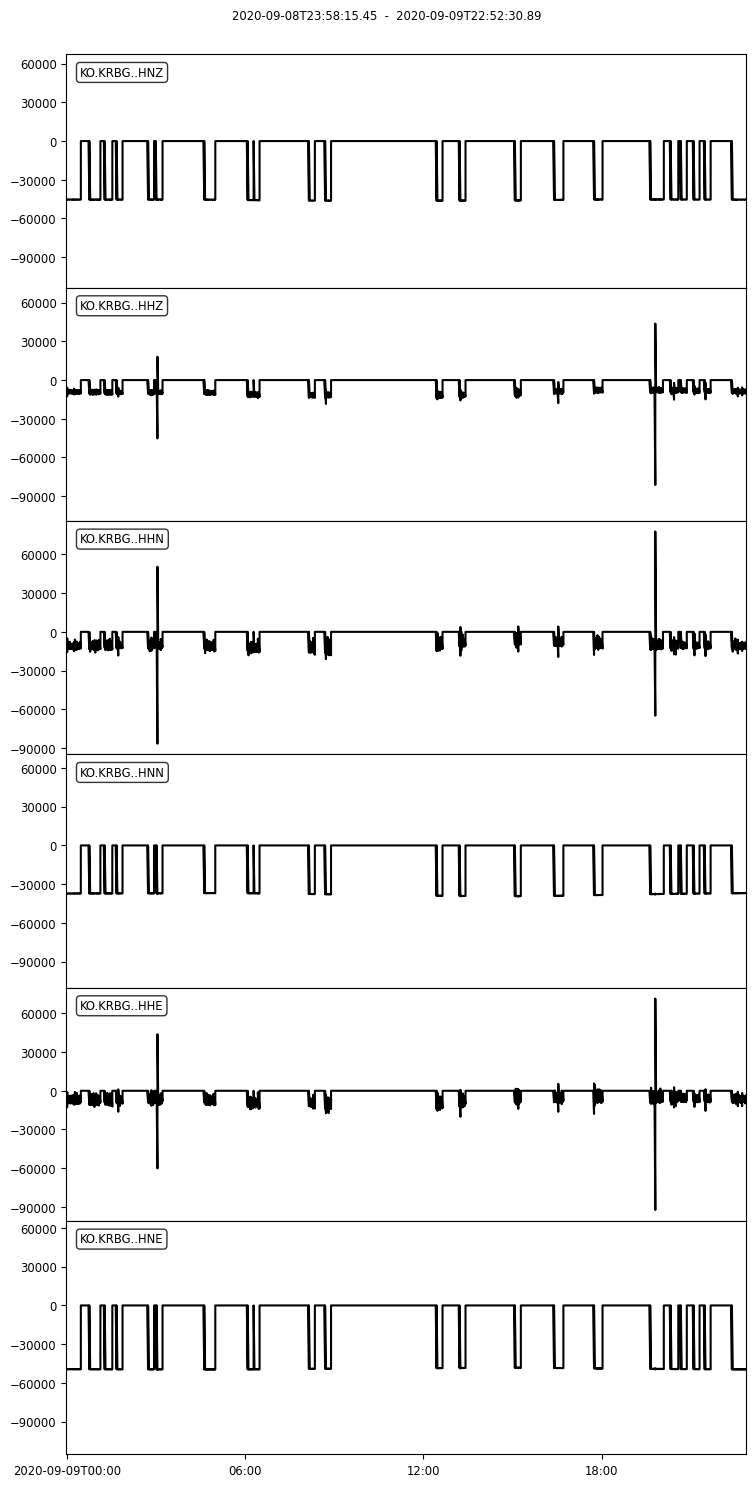

In [28]:
krbg_st.plot();

In [35]:
gazk_st = obspy.read('gazk.mseed')
gazk_st.merge()
gazk_st

3 Trace(s) in Stream:
KO.GAZK..HHE | 2020-09-08T23:58:18.340000Z - 2020-09-09T22:52:27.700000Z | 100.0 Hz, 8244937 samples (masked)
KO.GAZK..HHN | 2020-09-08T23:58:17.630000Z - 2020-09-09T22:52:26.010000Z | 100.0 Hz, 8244839 samples (masked)
KO.GAZK..HHZ | 2020-09-08T23:58:17.730000Z - 2020-09-09T22:52:26.110000Z | 100.0 Hz, 8244839 samples (masked)

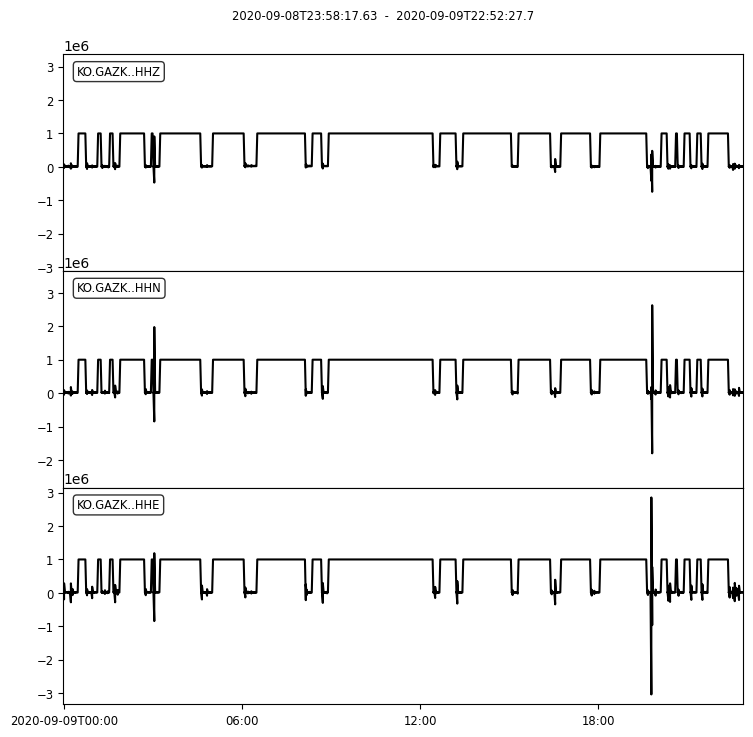

In [36]:
gazk_st.plot();

In [37]:
mrmt_st = obspy.read('gazk.mseed')
mrmt_st.merge()
mrmt_st

3 Trace(s) in Stream:
KO.GAZK..HHE | 2020-09-08T23:58:18.340000Z - 2020-09-09T22:52:27.700000Z | 100.0 Hz, 8244937 samples (masked)
KO.GAZK..HHZ | 2020-09-08T23:58:17.730000Z - 2020-09-09T22:52:26.110000Z | 100.0 Hz, 8244839 samples (masked)
KO.GAZK..HHN | 2020-09-08T23:58:17.630000Z - 2020-09-09T22:52:26.010000Z | 100.0 Hz, 8244839 samples (masked)

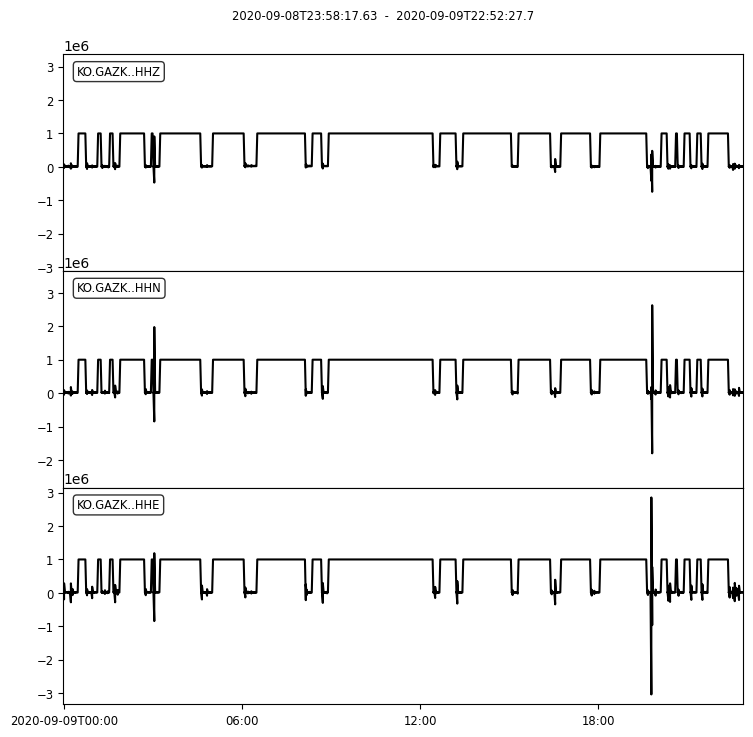

In [38]:
mrmt_st.plot();

## Reformatting for eida.koeri 

In [5]:
import pandas as pd
eqdf = pd.read_csv("earthquake_events.csv")
eqdf

,datetime,latitude,longitude,depth,magnitude_type,magnitude
0,2020-01-01 19:01:54.900,40.8197,28.9303,13.1,ML,2.1
1,2020-01-02 04:57:48.500,40.6353,29.1317,7.0,ML,2.0
2,2020-01-02 11:18:40.900,40.8308,28.3470,7.5,ML,2.9
3,2020-01-02 18:58:53.200,40.7002,29.2073,16.4,ML,1.8
4,2020-01-03 00:39:11.700,40.8820,28.2262,10.0,ML,1.6
...,...,...,...,...,...,...
784,2020-09-27 00:58:42.300,40.8212,28.1990,12.0,ML,1.8
785,2020-09-27 22:54:36.200,40.5463,27.4783,14.5,ML,2.4
786,2020-09-29 04:52:59.400,40.7453,27.3847,10.7,ML,2.0
787,2020-09-29 07:11:43.000,40.8432,28.1837,6.5,ML,1.7


In [7]:
eqdf = eqdf.drop(columns=["magnitude_type","magnitude"])
eqdf

,datetime,latitude,longitude,depth
0,2020-01-01 19:01:54.900,40.8197,28.9303,13.1
1,2020-01-02 04:57:48.500,40.6353,29.1317,7.0
2,2020-01-02 11:18:40.900,40.8308,28.3470,7.5
3,2020-01-02 18:58:53.200,40.7002,29.2073,16.4
4,2020-01-03 00:39:11.700,40.8820,28.2262,10.0
...,...,...,...,...
784,2020-09-27 00:58:42.300,40.8212,28.1990,12.0
785,2020-09-27 22:54:36.200,40.5463,27.4783,14.5
786,2020-09-29 04:52:59.400,40.7453,27.3847,10.7
787,2020-09-29 07:11:43.000,40.8432,28.1837,6.5


In [ ]:
eqdf.set_index("datetime",inplace=True)

In [ ]:
eqdf.to_csv("koeri_format_catalog.csv")

## Filtering Station Arrivals

In [20]:
import pandas as pd
df = pd.read_csv('station_arrivals.csv')

df['arrival_time'] = pd.to_datetime(df['arrival_time'])

start_date = '2020-09-01'
end_date = '2020-09-14'

krbg_sept_2020 = df[(df['station_name'] == 'KRBG') & (df['arrival_time'] >= start_date) & (df['arrival_time'] <= end_date)]

gazk_sept_2020 = df[(df['station_name'] == 'GAZK') & (df['arrival_time'] >= start_date) & (df['arrival_time'] <= end_date)]

krbg_sept_2020.to_csv('KRBG_01-09-2020_14-09-2020.csv', index=False)
gazk_sept_2020.to_csv('GAZK_01-09-2020_14-09-2020.csv', index=False)